# **Day18**: *Lavaduct Lagoon*

## Part 1
Thanks to your efforts, the machine parts factory is one of the first factories up and running since the lavafall came back. However, to catch up with the large backlog of parts requests, the factory will also need a large supply of lava for a while; the Elves have already started creating a large lagoon nearby for this purpose.

However, they aren't sure the lagoon will be big enough; they've asked you to take a look at the dig plan (your puzzle input). For example:

```
R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)
```

The digger starts in a 1 meter cube hole in the ground. They then dig the specified number of meters up (U), down (D), left (L), or right (R), clearing full 1 meter cubes as they go. The directions are given as seen from above, so if "up" were north, then "right" would be east, and so on. Each trench is also listed with the color that the edge of the trench should be painted as an RGB hexadecimal color code.

When viewed from above, the above example dig plan would result in the following loop of trench (#) having been dug out from otherwise ground-level terrain (.):

```
#######
#.....#
###...#
..#...#
..#...#
###.###
#...#..
##..###
.#....#
.######
```

At this point, the trench could contain 38 cubic meters of lava. However, this is just the edge of the lagoon; the next step is to dig out the interior so that it is one meter deep as well:

```
#######
#######
#######
..#####
..#####
#######
#####..
#######
.######
.######
```

Now, the lagoon can contain a much more respectable 62 cubic meters of lava. While the interior is dug out, the edges are also painted according to the color codes in the dig plan.

The Elves are concerned the lagoon won't be large enough; if they follow their dig plan, how many cubic meters of lava could it hold?

### Solution

In [39]:
def ccw(A,B,C):
    """Check if points A, B, and C are counter clockwise"""
    ax, ay = A
    bx, by = B
    cx, cy = C
    return (cy-ay) * (bx-ax) > (by-ay) * (cx-ax)

def intersect(line1, line2):
    """Check whether line1 and line2 intersect"""
    A, B = line1
    C, D = line2
    
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

def distance(A, B):
    """Calculates distance between two points"""
    ax, ay = A
    bx, by = B
    return ((ax - bx)**2 + (ay - by)**2)**0.5

def is_on_line(line, point):
    """Check whether a point is on the line"""
    A, B = line
    C = point
    return distance(A,C) + distance(C,B) == distance(A,B)


p1 = (0, 2)
p2 = (2, 2)
p3 = (0, 2)
p4 = (3, 2)

line1 = (p1, p2)
line2 = (p3, p4)

intersect(line1, line2)

False

In [40]:
def calculate_area(input_string):
    lines = input_string.splitlines()
    instructions = [tuple(line.split(' ')[:2]) for line in lines]

    direction_map = {'U': (0, -1), 'D': (0, 1), 'R': (1, 0), 'L': (-1, 0)}
    
    x, y = 0, 0
    vertices = [(x, y)] 
    for direction, distance in instructions:
        dx, dy = direction_map[direction] 
        x += dx*int(distance)
        y += dy*int(distance)
        vertices.append((x, y))


    lines = []
    for i in range(len(vertices)-1):
        lines.append((vertices[i], vertices[i+1]))

    x, y = zip(*vertices)
    xmax = max(x)+1
    ymax = max(y)+1

    grid = [['.' for _ in range(xmax)] for _ in range(ymax)] 

    area = 0
    for x in range(xmax):
        for y in range(ymax):
            fill = False
            point = (x, y)
            ray = ((-1, y), point)
            
            count = 0
            for line in lines:
                if is_on_line(line, point):
                    fill = True
                    continue
                if intersect(ray, line):
                    count += 1
            
            if count % 2 != 0 or fill==True:
                area += 1
                grid[y][x] = '#'

    return area


In [44]:
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def add(tuple1, tuple2):
        return (tuple1[0]+tuple2[0], tuple1[1]+tuple2[1])

def calculate_area(input_string, visualize=False):
    lines = input_string.splitlines()
    instructions = [tuple(line.split(' ')[:2]) for line in lines]

    direction_map = {'U': (0, -1), 'D': (0, 1), 'R': (1, 0), 'L': (-1, 0)}
    
    position = (0, 0)
    walls = [position]
    for direction, distance in instructions:
        step = direction_map[direction] 
        for _ in range(int(distance)):
            position = add(position, step)
            walls.append(position)
            
            
    
    
    # open_positions = [(1,1)]
    # closed_positions = []
    
    # area = [(1,1)]
    # area.extend(walls)
    
    # while open_positions:
    #     position = open_positions.pop(0)
    #     closed_positions.append(position)
    #     for direction in direction_map.values():
    #         new_position = add(position, direction)
    #         if new_position in walls or new_position in closed_positions:
    #             continue
    #         area.append(new_position)
    #         open_positions.append(new_position)
    
    if visualize:
        xdim = max(walls, key=lambda pos: pos[0])[0] + 1
        ydim = max(walls, key=lambda pos: pos[1])[1] + 1 
    
        grid = [[0 for _ in range(xdim)] for _ in range(ydim)] 
        for x, y in walls:
            print(x, y)
            grid[y][x] = 1
            
        plt.imshow(grid, cmap='binary', interpolation='none')
        plt.show()
    
    # return len(set(area))
            
            
    
    

In [116]:
import numpy as np

def area_irregular_polygon(x, y):
    # x, y = map(list, list(zip(*vertices)))
    
    x.append(x[0])
    y.append(y[0])
    area = 0
    for i in range(len(x)-1):
        matrix = np.array([x[i:i+2], y[i:i+2]])
        area += np.linalg.det(matrix)
    
    x.pop(-1)
    y.pop(-1)
    return area/2
    
    
    
# vertices = [
#     (0, 0),
#     (4, 0),
#     (4, 2),
#     (0, 2)
# ]

# area_irregular_polygon(vertices)

In [117]:
def calculate_area(input_string):
    lines = input_string.splitlines()
    instructions = [tuple(line.split(' ')[:2]) for line in lines]

    direction_map = {'U': (0, -1), 'D': (0, 1), 'R': (1, 0), 'L': (-1, 0)}
    
    # x, y = 0, 0
    # vertices = [(x, y)] 
    # for direction, distance in instructions:
    #     dx, dy = direction_map[direction] 
    #     x += dx*int(distance)
    #     y += dy*int(distance)
    #     vertices.append((x, y))
        
    # area_irregular_polygon(vertices)
        
    
    xi, yi = 0, 0
    x, y = [], []
    
    for direction, distance in instructions:
        dx, dy = direction_map[direction]
        for _ in range(int(distance)):
            xi += dx
            yi += dy
            
            x.append(xi)
            y.append(yi)
            
    
    
    
    xlim = (min(x), max(x)+1)
    ylim = (min(y), max(y)+1)
    
    grid = [[0 for _ in range(*xlim)] for _ in range(*ylim)]        
    for xi, yi in zip(x, y):
        grid[yi][xi] = 1
        
    plt.imshow(grid, cmap='binary', interpolation='none')
    plt.show()
    
    A = area_irregular_polygon(x, y)
    b = len(x)  # -1 
    area = A + b/2 + 1
    return area
        
        
    
        

### Example

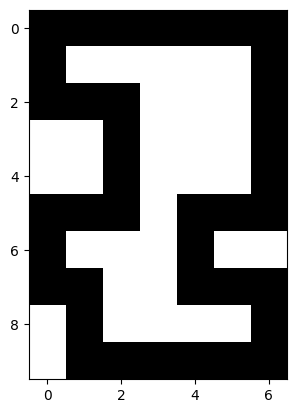

62.0

In [118]:
input_string = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)"""


calculate_area(input_string)


### Submission

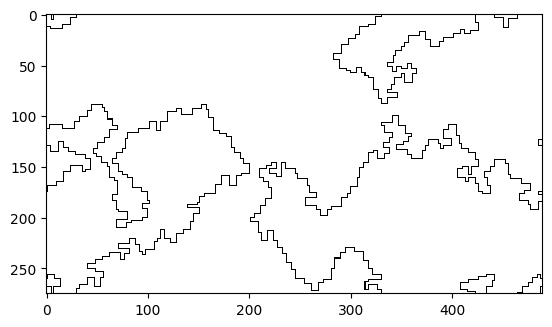

56678.000000000044

In [119]:
with open('input/day18.txt', 'r') as file:
    input_string = file.read()

calculate_area(input_string)


## Part 2

text

### Solution

In [128]:
import numpy as np

def area_irregular_polygon(vertices):
    x, y = map(list, list(zip(*vertices)))
    
    x.append(x[0])
    y.append(y[0])
    area = 0
    for i in range(len(x)-1):
        matrix = np.array([x[i:i+2], y[i:i+2]])
        area += np.linalg.det(matrix)
    
    x.pop(-1)
    y.pop(-1)
    return area/2

In [153]:
def calculate_area(input_string):   
    x, y = 0, 0
    vertices = [(x, y)] 
    perimeter = 0
      
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    for line in input_string.splitlines():
        code = line.split('(')[1][1:-1]
        distance = int(code[:-1], 16)
                
        dx, dy = directions[int(code[-1])]
        x += dx*int(distance)
        y += dy*int(distance)
        perimeter += abs(dx*int(distance) + dy*int(distance))
        
        vertices.append((x, y))
            
    A = area_irregular_polygon(vertices)
    area = A + perimeter/2 + 1
    return int(round(area))
        
        
    
        


### Example

In [154]:
input_string = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)"""


calculate_area(input_string)


952408144115

### Submission

In [155]:
with open('input/day18.txt', 'r') as file:
    input_string = file.read()


calculate_area(input_string)


79088855654037